In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size= 100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)

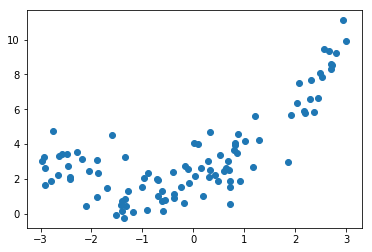

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
# 线性方式拟合
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

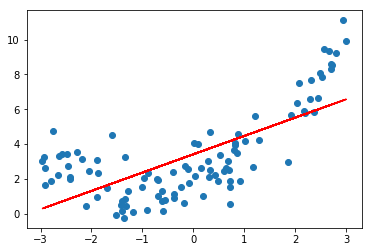

In [8]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

# 多项式方式求解

In [9]:
# 添加一个新的特征
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [11]:
# 用新组成的样本重新进行线性拟合
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

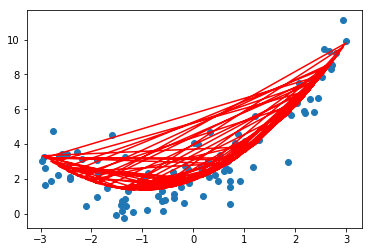

In [12]:
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(x, y_predict2, color='r')
plt.show()

由于X无序排列，为了得到拟合的曲线，将X从小到大排列后进行绘图

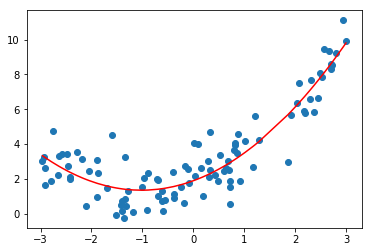

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [14]:
lin_reg2.coef_

array([1.06962327, 0.52487045])

对应样本X2 = [X, X**2]的系数

# scikit-learn中的多项式回归

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)

X2 = poly.transform(X)

In [16]:
X2.shape

(100, 3)

In [17]:
X2[:5, :]

array([[ 1.        , -2.63971814,  6.96811185],
       [ 1.        ,  0.09296968,  0.00864336],
       [ 1.        , -2.56859405,  6.59767541],
       [ 1.        ,  2.45799071,  6.04171831],
       [ 1.        , -2.04840969,  4.19598224]])

三列分别是 x的0次方，1次方，2次方

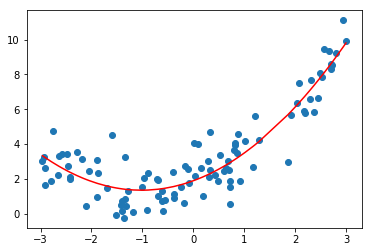

In [18]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [19]:
lin_reg2.coef_

array([0.        , 1.06962327, 0.52487045])

# Pipeline  包装重复步骤

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [23]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

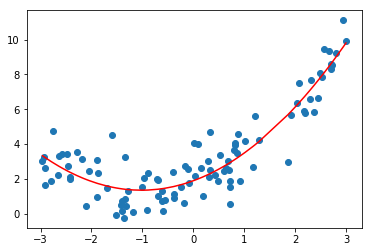

In [25]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()